# Plotting spectral Image

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') #don't display warnings
import os

#### Receive Files

In [30]:
location_of_data = "../data/" # Note: you will need to update this filepath according to your local machine
os.chdir(location_of_data) #sometimes weird error where you need to delete and add points to the location (../data/ -> date/)
import neon_aop_hyperspectral as neon_hs
sercRefl, sercRefl_md = neon_hs.aop_h5refl2array(location_of_data +'NEON_D02_SERC_DP3_368000_4306000_reflectance.h5')
print("Shape: ", sercRefl.shape)

Shape:  (1000, 1000, 426)


In [43]:
print(sercRefl_md)

[[[0.0501 0.0383 0.0289 ... 0.4184 1.2245 1.4882]
  [0.0488 0.0371 0.0294 ... 0.5763 1.1199 1.4882]
  [0.0523 0.0412 0.0361 ... 0.5337 0.7127 1.4882]
  ...
  [0.0509 0.0419 0.0219 ... 0.3551 1.148  1.4882]
  [0.056  0.0362 0.0282 ... 0.2496 0.5152 1.4882]
  [0.053  0.0379 0.0379 ... 0.4809 0.6871 1.2562]]

 [[0.0372 0.036  0.0262 ... 0.1401 1.4882 1.4882]
  [0.0602 0.0433 0.0328 ... 0.4583 0.9957 1.4882]
  [0.082  0.0712 0.0609 ... 0.7484 1.4882 1.4882]
  ...
  [0.0483 0.0309 0.019  ... 0.1895 0.9451 1.4882]
  [0.0485 0.0394 0.0327 ... 0.1222 0.7092 1.4882]
  [0.0409 0.0375 0.021  ... 0.3501 0.4877 1.4882]]

 [[0.05   0.0387 0.0323 ... 0.0768 1.4882 1.4882]
  [0.0606 0.0402 0.0408 ... 0.2915 1.0742 1.4882]
  [0.1226 0.1055 0.097  ... 0.224  0.6547 1.4882]
  ...
  [0.0428 0.0268 0.0266 ... 0.3673 1.1133 1.4882]
  [0.0434 0.0399 0.028  ... 0.1921 1.0347 1.4882]
  [0.0609 0.0332 0.0263 ... 0.1938 1.207  1.4882]]

 ...

 [[0.0699 0.0436 0.0329 ... 0.4025 0.5803 1.4882]
  [0.0598 0.0363 0.0

#### Turn into readable pandas arrays

In [6]:
serc_pixel_df = pd.DataFrame()
serc_pixel_df['reflectance'] = sercRefl[500,500,:]
serc_pixel_df['wavelengths'] = sercRefl_md['wavelength']
print("Head:", serc_pixel_df.head(5), '\n')
print("Tail:", serc_pixel_df.tail(5), '\n')

Head:    reflectance  wavelengths
0       0.0860   383.534302
1       0.0667   388.542206
2       0.0531   393.550110
3       0.0434   398.558014
4       0.0375   403.565887 

Tail:      reflectance  wavelengths
421       0.7394  2491.863037
422       0.2232  2496.870850
423       0.5458  2501.878906
424       1.4881  2506.886719
425       1.4882  2511.894531 



#### Check for the bad water places

In [7]:
bbw1 = sercRefl_md['bad band window1']; 
bbw2 = sercRefl_md['bad band window2']; 
print('Bad Band Window 1:',bbw1)
print('Bad Band Window 2:',bbw2)

Bad Band Window 1: [1340 1445]
Bad Band Window 2: [1790 1955]


#### Plot graph with the faults

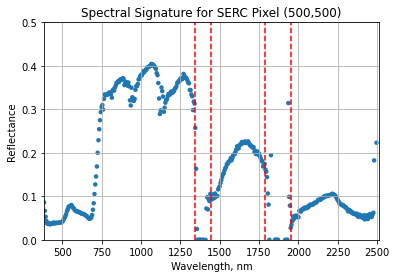

In [8]:
serc_pixel_df.plot(x='wavelengths',y='reflectance',kind='scatter',edgecolor='none');
plt.title('Spectral Signature for SERC Pixel (500,500)') #title
ax1 = plt.gca()
ax1.grid('on')
ax1.set_xlim([np.min(serc_pixel_df['wavelengths']), np.max(serc_pixel_df['wavelengths'])]); 
ax1.set_ylim(0,0.5)
ax1.set_xlabel("Wavelength, nm") #xlabel
ax1.set_ylabel("Reflectance") #ylabel

#Add in red dotted lines to show boundaries of bad band windows:
ax1.plot((1340,1340),(0,1.5), 'r--')
ax1.plot((1445,1445),(0,1.5), 'r--')
ax1.plot((1790,1790),(0,1.5), 'r--')
ax1.plot((1955,1955),(0,1.5), 'r--')

#### Delete bad bands and the last ones

In [9]:
import copy
w = copy.copy(sercRefl_md['wavelength']) #make a copy to deal with the mutable data type
w[((w >= 1340) & (w <= 1445)) | ((w >= 1790) & (w <= 1955))]=np.nan #can also use bbw1[0] or bbw1[1] to avoid hard-coding in
w[-10:]=np.nan;  # the last 10 bands sometimes have noise - best to eliminate
print(w) #optionally print wavelength values to show that -9999 values are replaced with nan

[ 383.5343  388.5422  393.5501  398.558   403.5659  408.5738  413.5817
  418.5896  423.5975  428.6054  433.6133  438.6213  443.6292  448.6371
  453.645   458.6529  463.6608  468.6687  473.6766  478.6845  483.6924
  488.7003  493.7082  498.7161  503.724   508.7319  513.7399  518.7478
  523.7557  528.7636  533.7715  538.7794  543.7873  548.7952  553.8031
  558.811   563.8189  568.8268  573.8347  578.8426  583.8505  588.8585
  593.8664  598.8743  603.8822  608.8901  613.898   618.9059  623.9138
  628.9217  633.9296  638.9375  643.9454  648.9533  653.9612  658.9691
  663.9771  668.985   673.9929  679.0008  684.0087  689.0166  694.0245
  699.0324  704.0403  709.0482  714.0561  719.064   724.0719  729.0798
  734.0877  739.0956  744.1036  749.1115  754.1194  759.1273  764.1352
  769.1431  774.151   779.1589  784.1668  789.1747  794.1826  799.1905
  804.1984  809.2063  814.2142  819.2222  824.2301  829.238   834.2459
  839.2538  844.2617  849.2696  854.2775  859.2854  864.2933  869.3012
  874.

In [10]:
sercb400 = sercRefl[:,:,400]
#define index corresponding to nan values:
nan_ind = np.argwhere(np.isnan(w))

#define refl_band, refl, and metadata 
refl_band = sercb400
refl = copy.copy(sercRefl)
metadata = copy.copy(sercRefl_md)

In [28]:
from IPython.html.widgets import *

def spectraPlot(pixel_x,pixel_y):

    reflectance = refl[pixel_y,pixel_x,:]
    reflectance[nan_ind]=np.nan
    
    pixel_df = pd.DataFrame()
    pixel_df['reflectance'] = reflectance
    pixel_df['wavelengths'] = w

    fig = plt.figure(figsize=(15,5))
    graph = fig.add_subplot(1,2,1)

    # fig, axes = plt.subplots(nrows=1, ncols=2)
    pixel_df.plot(ax=graph,x='wavelengths',y='reflectance',kind='scatter',edgecolor='none');
    graph.set_title('Spectra of Pixel (' + str(pixel_x) + ',' + str(pixel_y) + ')')
    graph.set_xlim([np.min(metadata['wavelength']),np.max(metadata['wavelength'])]); 
    graph.set_ylim([np.min(pixel_df['reflectance']),np.max(pixel_df['reflectance']*1.1)])
    graph.set_xlabel("Wavelength, nm"); ax1.set_ylabel("Reflectance")
    graph.grid('on')

    photo = fig.add_subplot(1,2,2)
    plot = plt.imshow(refl_band,extent=metadata['spatial extent'],clim=(0,0.1)); 
    plt.title('Pixel Location'); 
    cbar = plt.colorbar(plot,aspect=20); plt.set_cmap('gist_earth'); 
    cbar.set_label('Reflectance',rotation=90,labelpad=20); 
    photo.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
    rotatexlabels = plt.setp(photo.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees
    
    photo.plot(metadata['spatial extent'][0]+pixel_x,metadata['spatial extent'][3]-pixel_y,'s',markersize=5,color='red')
    photo.set_xlim(metadata['spatial extent'][0],metadata['spatial extent'][1])
    photo.set_ylim(metadata['spatial extent'][2],metadata['spatial extent'][3])





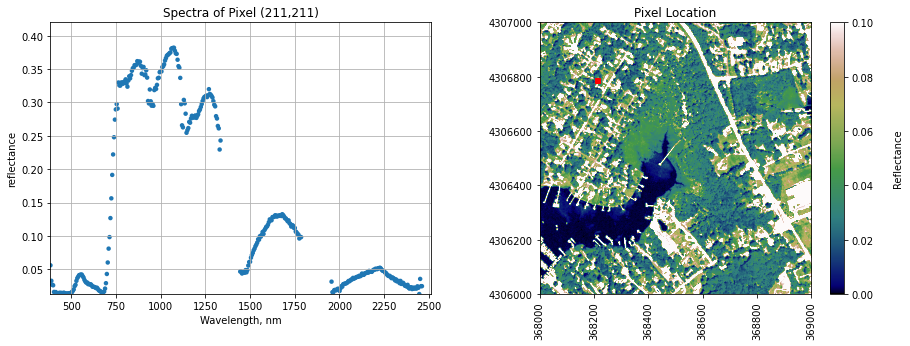

<function __main__.spectraPlot(pixel_x, pixel_y)>

In [42]:
coordinaten = [422, 422]
interact(spectraPlot, pixel_x = (0,coordinaten[0],1),pixel_y=(0,coordinaten[1],1))

In [36]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [37]:
def f(x):
    return x

In [38]:
interact(f, x=10);

10